# Read shipfix data and prepare them

In [12]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt


# TODO

il y a du recouvrement avec `Regression` (stop après l'export pickle)

# Exploration of the shipfix data

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import io_loader

In [ ]:
data_container = io_loader.DataConfigurator()
data_container.dirs

In [59]:
save_concatenated_and_truncated_ts_in = "./data_out/all_from_to.pkl"

In [16]:
data_container.load_all()

loading from ./data_in/shipfix/export_coal...


  0%|          | 0/5 [00:00<?, ?it/s]

...5 files loaded.
loading from ./data_in/shipfix/import_coal...


  0%|          | 0/9 [00:00<?, ?it/s]

...9 files loaded.


In [17]:
data_container.define_import_export()

Done:
... export to  ['Indonesia', 'Australia', 'SAFR', 'US', 'Russia']
... import in ['India', 'China', 'Vietnam', 'Japan', 'South Korea']


In [18]:
data_container.export_to_countries

['Indonesia', 'Australia', 'SAFR', 'US', 'Russia']

In [19]:
day='2021-03-10'

In [20]:
day_exports_all_trunc_df, day_exports_to, day_imports_in = data_container.export_on(day='2021-03-10')

/home/jovyan/persistent/notebooks/shipping_3A/io_loader.py:135: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [21]:
day_exports_all_trunc_df[['India', 'China', 'Vietnam', 'Japan', 'South Korea', 'Others']]

,India,China,Vietnam,Japan,South Korea,Others
Indonesia,988234,36710,172537,0,145373,292211
Australia,117472,0,0,0,58736,128486
SAFR,108662,0,0,0,0,84433
US,0,0,0,0,0,139498
Russia,22026,259172,0,161523,88838,328188
Others,99117,408215,0,38912,66078,0


<pre>
            India   China  Vietnam   Japan  South Korea  Other_imp
Indonesia  988234   36710   172537       0       145373     292211
Australia  117472       0        0       0        58736     128486
SAFR       108662       0        0       0            0      84433
US              0       0        0       0            0     139498
Russia      22026  259172        0  161523        88838     328188
Other_exp   99117  408215        0   38912        66078          0
</pre>

In [22]:
import io_plots

f = io_plots.plot_sankey(
    day_exports_all_trunc_df.rename(
        columns={'Others': 'Other destinations'}, index={'Others': 'Other sources'}
    ), title="Flux Sankey exportateurs → importateurs (Coal)"
)

In [49]:
# This is only a test
export_temp_dict = {
    key: data_container.reduce_exports(key,data_container.data_export_to[key]) 
    for key in data_container.data_export_to.keys()
}
export_temp_dict['Indonesia'] # check OK

country_from Indonesia                                             
country_to       Japan South Korea   China Vietnam    India  Others
Date                                                               
2015-01-02           0           0   50783       0   152348  415290
2015-01-03           0           0       0       0        0       0
2015-01-04           0           0       0       0   120971       0
2015-01-05      159706      422752  650568       0   851377  290053
2015-01-06           0           0  631632   35221  1003801  524795
...                ...         ...     ...     ...      ...     ...
2025-05-13       47000           0  424001       0   813000  886000
2025-05-14      310000      136000  634001  200000   275000  356500
2025-05-15       50000           0  485000   68000   378001  574000
2025-05-16       91000           0       0   50000   341000  406000
2025-05-17           0           0       0   50000    50000       0

[3789 rows x 6 columns]

In [53]:
df_from_to_good = data_container.concatenate_all()
df_from_to_good

country_from Indonesia                                              Australia  \
country_to       Japan South Korea   China Vietnam    India  Others     Japan   
Date                                                                            
2015-01-02           0           0   50783       0   152348  415290         0   
2015-01-03           0           0       0       0        0       0         0   
2015-01-04           0           0       0       0   120971       0         0   
2015-01-05      159706      422752  650568       0   851377  290053         0   
2015-01-06           0           0  631632   35221  1003801  524795     79835   
...                ...         ...     ...     ...      ...     ...       ...   
2025-05-13       47000           0  424001       0   813000  886000    196000   
2025-05-14      310000      136000  634001  200000   275000  356500    271000   
2025-05-15       50000           0  485000   68000   378001  574000    130000   
2025-05-16       91000           0       0   50000   341000  406000     80000   
2025-05-17           0           0       0   50000    50000       0         0   

country_from                              ...    US                          \
country_to   South Korea   China Vietnam  ... China  Japan   India   Others   
Date                                      ...                                 
2015-01-02         90281  167019       0  ...     0      0       0   330088   
2015-01-03             0       0       0  ...     0      0       0        0   
2015-01-04             0       0       0  ...     0      0       0   124529   
2015-01-05        159706  460332       0  ...     0      0  240735   958239   
2015-01-06             0  563538       0  ...     0      0   88053  1015539   
...                  ...     ...     ...  ...   ...    ...     ...      ...   
2025-05-13        220000  402998  682000  ...     0  68000   75000   424000   
2025-05-14             0  598000  165000  ...     0      0   50000   105000   
2025-05-15             0  580000       0  ...     0      0  155000   241000   
2025-05-16             0  410000       0  ...     0      0       0    75000   
2025-05-17             0       0       0  ...     0      0       0    75000   

country_from Russia                                              
country_to    Japan South Korea   China Vietnam   India  Others  
Date                                                             
2015-01-02        0           0       0       0       0   67710  
2015-01-03        0           0       0       0       0       0  
2015-01-04        0           0       0       0       0       0  
2015-01-05        0       82202       0       0   23486  135046  
2015-01-06    23480      166714       0       0       0   93923  
...             ...         ...     ...     ...     ...     ...  
2025-05-13        0           0  245000       0       0  415850  
2025-05-14        0       16000       0       0  236000  180350  
2025-05-15        0       30000   95000       0   75000  246950  
2025-05-16        0           0   53000       0       0   68000  
2025-05-17        0           0       0       0       0       0  

[3789 rows x 26 columns]

In [58]:
df_from_to = data_container.concatenate_and_truncate_all()
df_from_to # <-- checked to be the same

country_from Indonesia                                              Australia  \
country_to       Japan South Korea   China Vietnam    India  Others     Japan   
Date                                                                            
2015-01-05      159706      422752  650568       0   851377  290053         0   
2015-01-06           0           0  631632   35221  1003801  524795     79835   
2015-01-07           0      110056  258063   25300   407337  158127    110056   
2015-01-08           0      104207  315224   39077   657804  240974    182362   
2015-01-09           0       84682  143210   37359   336234  682433     62266   
...                ...         ...     ...     ...      ...     ...       ...   
2025-05-13       47000           0  424001       0   813000  886000    196000   
2025-05-14      310000      136000  634001  200000   275000  356500    271000   
2025-05-15       50000           0  485000   68000   378001  574000    130000   
2025-05-16       91000           0       0   50000   341000  406000     80000   
2025-05-17           0           0       0   50000    50000       0         0   

country_from                              ...      Russia                  \
country_to   South Korea   China Vietnam  ... South Korea   China Vietnam   
Date                                      ...                               
2015-01-05        159706  460332       0  ...       82202       0       0   
2015-01-06             0  563538       0  ...      166714       0       0   
2015-01-07             0  164452       0  ...      183427       0       0   
2015-01-08        140679  677344       0  ...           0    7164       0   
2015-01-09             0  261517       0  ...      209213       0       0   
...                  ...     ...     ...  ...         ...     ...     ...   
2025-05-13        220000  402998  682000  ...           0  245000       0   
2025-05-14             0  598000  165000  ...       16000       0       0   
2025-05-15             0  580000       0  ...       30000   95000       0   
2025-05-16             0  410000       0  ...           0   53000       0   
2025-05-17             0       0       0  ...           0       0       0   

country_from                  Others                                     
country_to     India  Others   India   China Vietnam  Japan South Korea  
Date                                                                     
2015-01-05     23486  135046   41101  463853   11743      0           0  
2015-01-06         0   93923   98618  119752   11740      0           0  
2015-01-07         0  151800   86021  180896       0      0           0  
2015-01-08         0   13024  200598   80759    3907      0      208414  
2015-01-09         0   18056   47322       0       0  59775           0  
...              ...     ...     ...     ...     ...    ...         ...  
2025-05-13         0  415850  150000   63000       0  70000       20000  
2025-05-14    236000  180350  118000       0       0  75000           0  
2025-05-15     75000  246950  171750   60000   48000  80000       29000  
2025-05-16         0   68000  588500       0       0  34000       40000  
2025-05-17         0       0   30000       0       0      0           0  

[3786 rows x 31 columns]

In [ ]:
import pickle

with open(save_concatenated_and_truncated_ts_in, "wb") as f:
    pickle.dump(df_from_to, f)

# Old code

In [28]:


fdir_export_coal = './data_in/shipfix/export_coal'
!ls -alrth {fdir_export_coal}

fdir_export_project = './data_in/shipfix/export_cproject'
!ls -alrth {fdir_export_project}

fdir_import_coal = './data_in/shipfix/import_coal'
!ls -alrth {fdir_import_coal}
fdir_import_project = './data_in/shipfix/import_cproject'
!ls -alrth {fdir_import_project}

total 1.3M
drwxr-xr-x 7 jovyan 1000    7 Aug 15 15:22 ..
-rw-r--r-- 1 jovyan 1000 254K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_Indonesia_to.xlsx
-rw-r--r-- 1 jovyan 1000 217K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_Russia_to.xlsx
-rw-r--r-- 1 jovyan 1000 200K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_SAFR_to.xlsx
-rw-r--r-- 1 jovyan 1000 226K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_Australia_to.xlsx
drwxr-xr-x 2 jovyan 1000    7 Aug 15 15:23 .
-rw-r--r-- 1 jovyan 1000 201K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_US_to.xlsx
total 1.3M
drwxr-xr-x 7 jovyan 1000    7 Aug 15 15:22 ..
-rw-r--r-- 1 jovyan 1000 169K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_India_to.xlsx
-rw-r--r-- 1 jovyan 1000 157K Aug 15 15:23 all_voyage_orders_by_cargo_type_time_series_stacked_Japan_to.xlsx
-rw-r--r-- 1 jovyan 1000 160K Aug 15 15:23 all_voyage_orders_by_cargo_typ

# content of excel data

In [29]:
from glob import glob
from tqdm.notebook import tqdm
from collections import namedtuple
import warnings
import os
import re

FSCC = namedtuple('FSC', ['file', 'name', 'shape', 'columns', 'content'])

#fname = 'demand - all_voyage_orders_by_cargo_type_time_series_stacked - size.xlsx'

files_content_lst = []



for fname in tqdm(glob(fdir_export_coal + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )

for fname in tqdm(glob(fdir_export_project + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )
    
for fname in tqdm(glob(fdir_import_coal + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )

    
for fname in tqdm(glob(fdir_import_project + '/*.xlsx')):
    
    # Replace 'your_file.xlsx' with the path to your Excel file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module=re.escape('openpyxl.styles.stylesheet'))
        df = pandas.read_excel(fname, engine='openpyxl')
    files_content_lst.append(
        FSCC(fname, os.path.basename(fname).split('.')[0], df.shape, df.columns, df)
    )


class FileContainer:
    content = files_content_lst
    @classmethod
    def get(cls, name=None):
        if name is None:
            return [f.name for f in cls.content]
        else:
            for f in cls.content:
                if f.name == name:
                    return f
            return None
    @classmethod
    def pprint(cls):
        txt_lst = []
        for f in files_content_lst:
            txt_lst.append(f">>> {f.name}:\n {f.columns.values}")
        return "\n".join(txt_lst)
    @classmethod
    def iterate(cls):
        for f in files_content_lst:
            yield(f)
    @classmethod
    def update(cls, content):
        cls.content = content



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [30]:
print(FileContainer.get())
print(FileContainer.get(FileContainer.get()[4]).content)


['all_voyage_orders_by_cargo_type_time_series_stacked_US_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_Australia_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_SAFR_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_Russia_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_Indonesia_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_Japan_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_India_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_China_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_SK_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_Vietnam_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_to_Vietnam', 'all_voyage_orders_by_cargo_type_time_series_stacked_to_China', 'all_voyage_orders_by_cargo_type_time_series_stacked_US_to', 'all_voyage_orders_by_cargo_type_time_series_stacked_to_Japan', 'all_voyage_orders_by_cargo_type_time_series_stacked_to_SK', 'all_voyage_orders_by_cargo_type_time_s

# dataframe generation

In [31]:
# données d'exportations Coal
df_coal_Indonesia_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Indonesia_to').content
df_coal_Australia_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Australia_to').content
df_coal_SAFR_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_SAFR_to').content
df_coal_US_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_US_to').content
df_coal_Russia_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Russia_to').content

# données d'importations coal
df_coal_India_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_to_India').content
df_coal_China_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_to_China').content
df_coal_Vietnam_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_to_Vietnam').content
df_coal_Japan_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_to_Japan').content
df_coal_SK_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_to_SK').content

# données d'exportations Project
df_project_India_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_India_to').content
df_project_China_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_China_to').content
df_project_Vietnam_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Vietnam_to').content
df_project_Japan_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Japan_to').content
df_project_SK_to = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_SK_to').content

# données d'importations Project
df_project_Turkey_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Turkey_in').content
df_project_Bangladesh_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Bangladesh_in').content
df_project_Nigeria_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Nigeria_in').content
df_project_Egypt_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Egypt_in').content
df_project_Libya_in = FileContainer.get('all_voyage_orders_by_cargo_type_time_series_stacked_Lybia_in').content


data_import= {'Coal': {'India': df_coal_India_in, 'China':df_coal_China_in, 'Vietnam':df_coal_Vietnam_in, 'Japan':df_coal_Japan_in,'South Korea':df_coal_SK_in},
              'Project': {'Turkey': df_project_Turkey_in, 'Bangladesh':df_project_Bangladesh_in, 'Nigeria':df_project_Nigeria_in, 'Egypt':df_project_Egypt_in,'Libya':df_project_Libya_in}}

data_export= {'Coal': {'Indonesia': df_coal_Indonesia_to, 'Australia':df_coal_Australia_to, 'SAFR':df_coal_SAFR_to, 'US':df_coal_US_to,'Russia':df_coal_Russia_to},
              'Project': {'India': df_project_India_to, 'China':df_project_China_to, 'Vietnam':df_project_Vietnam_to, 'Japan':df_project_Japan_to,'South Korea':df_project_SK_to}}

# Destinations uniques
export_countries= {'Coal':['Indonesia','Australia','SAFR','US','Russia', 'Other_exp'],
                   'Project':['India','China','Vietnam','Japan','South Korea', 'Other_imp']}

import_countries={'Coal':['India','China','Vietnam','Japan','South Korea', 'Other_imp'],
                  'Project':['Turkey','Bangladesh','Nigeria','Egypt','Libya', 'Other_imp']}

df_temp={'Coal':'',
         'Project':''}

day='2021-03-10'
print(data_export['Project']['India'])



            Date  Turkey  India  United Arab Emirates  Saudi Arabia  \
0     2015-01-06   45474      0                     0             0   
1     2015-01-07       0      0                     0             0   
2     2015-01-08       0      0                     0             0   
3     2015-01-09       0      0                     0             0   
4     2015-01-10       0      0                     0             0   
...          ...     ...    ...                   ...           ...   
3803  2025-06-05       0      0                     0             0   
3804  2025-06-06       0      0                     0             0   
3805  2025-06-07       0      0                     0             0   
3806  2025-06-08       0      0                     0             0   
3807  2025-06-09       0      0                     0             0   

      Indonesia  Bangladesh  China     US  Germany  Russia  Other  
0             0           0      0      0        0       0    909  
1          

# dataframe per day

In [32]:
df_coal_Indonesia_to.tail()

,Date,Bangladesh,India,Philippines,China,Thailand,South Korea,Vietnam,Malaysia,Japan,Taiwan,Other
3784,2025-05-13,210000,813000,288000,424001,220000,0,0,0,47000,68000,100000
3785,2025-05-14,30500,275000,30000,634001,82000,136000,200000,58000,310000,0,156000
3786,2025-05-15,0,378001,146000,485000,210000,0,68000,0,50000,0,218000
3787,2025-05-16,50000,341000,161000,0,55000,0,50000,0,91000,0,140000
3788,2025-05-17,0,50000,0,0,0,0,50000,0,0,0,0


In [33]:
df_coal_India_in.tail(3)

,Date,Mozambique,US,Australia,India,China,Russia,Indonesia,Singapore,SAFR,Colombia,Other
3792,2025-05-20,0,185000,75000,324000,0,75000,369000,0,143000,0,143000
3793,2025-05-21,75000,115000,503000,107000,0,0,420000,0,75000,0,136000
3794,2025-05-22,80000,300000,743000,0,0,225000,391000,0,243000,0,75000


In [34]:

# Données du jour
def data_day(df):
    return df[df['Date'] == day].iloc[0, 1:]
    
#données d'export journalière
day_df_export={'Coal': [data_day(df_coal_Indonesia_to),data_day(df_coal_Australia_to),data_day(df_coal_SAFR_to),data_day(df_coal_US_to),data_day(df_coal_Russia_to)]}
day_df_coal_Indonesia_to = day_df_export['Coal'][0]
day_df_coal_Australia_to = day_df_export['Coal'][1]
day_df_coal_SAFR_to = day_df_export['Coal'][2]
day_df_coal_US_to = day_df_export['Coal'][3]
day_df_coal_Russia_to = day_df_export['Coal'][4]

#données d'import journalière
day_df_import={'Coal': [data_day(df_coal_India_in),data_day(df_coal_China_in),data_day(df_coal_Vietnam_in),data_day(df_coal_Japan_in),data_day(df_coal_SK_in)]}
day_df_coal_India_in = day_df_import['Coal'][0]
day_df_coal_China_in = day_df_import['Coal'][1]
day_df_coal_Vietnam_in = day_df_import['Coal'][2]
day_df_coal_Japan_in = day_df_import['Coal'][3]
day_df_coal_SK_in = day_df_import['Coal'][4]


# Diagram sankey

In [35]:
import plotly.graph_objects as go






matrix_export={'Coal':pandas.DataFrame(0, index=export_countries['Coal'], columns=import_countries['Coal']) }
import_countries_coal=import_countries['Coal']



# remplissage matrice d'export
for good in matrix_export:
    for country in import_countries[good]:
        if country == 'Other_imp':
            matrix_export[good].at[export_countries[good][0], country] = day_df_export[good][0].sum()-matrix_export[good].loc[export_countries[good][0]].iloc[:-1].sum()
        else:
            matrix_export[good].at[export_countries[good][0], country] = day_df_export[good][0][country] if country in day_df_export[good][0].index else 0
    for country in import_countries[good]:
        if country == 'Other_imp':
            matrix_export[good].at[export_countries[good][1], country] = day_df_export[good][1].sum()-matrix_export[good].loc[export_countries[good][1]].iloc[:-1].sum()
        else:
            matrix_export[good].at[export_countries[good][1], country] = day_df_export[good][1][country] if country in day_df_export[good][1].index else 0
    for country in import_countries_coal:
        if country == 'Other_imp':
            matrix_export[good].at[export_countries[good][2], country] = day_df_export[good][2].sum()-matrix_export[good].loc[export_countries[good][2]].iloc[:-1].sum()
        else:
            matrix_export[good].at[export_countries[good][2], country] = day_df_export[good][2][country] if country in day_df_export[good][2].index else 0
    for country in import_countries_coal:
        if country == 'Other_imp':
            matrix_export[good].at[export_countries[good][3], country] = day_df_export[good][3].sum()-matrix_export[good].loc[export_countries[good][3]].iloc[:-1].sum()
        else:
            matrix_export[good].at[export_countries[good][3], country] = day_df_export[good][3][country] if country in day_df_export[good][3].index else 0
    for country in import_countries_coal:
        if country == 'Other_imp':
            matrix_export[good].at[export_countries[good][4], country] = day_df_export[good][4].sum()-matrix_export[good].loc[export_countries[good][4]].iloc[:-1].sum()
        else:
            matrix_export[good].at[export_countries[good][4], country] = day_df_export[good][4][country] if country in day_df_export[good][4].index else 0
            
    matrix_export[good].at['Other_exp', import_countries[good][0]]= day_df_import[good][0].sum()-matrix_export[good][import_countries[good][0]].iloc[:-1].sum()
    matrix_export[good].at['Other_exp', import_countries[good][1]]= day_df_import[good][1].sum()-matrix_export[good][import_countries[good][1]].iloc[:-1].sum()
    matrix_export[good].at['Other_exp', import_countries[good][2]]= day_df_import[good][2].sum()-matrix_export[good][import_countries[good][2]].iloc[:-1].sum()
    matrix_export[good].at['Other_exp', import_countries[good][3]]= day_df_import[good][3].sum()-matrix_export[good][import_countries[good][3]].iloc[:-1].sum()
    matrix_export[good].at['Other_exp', import_countries[good][4]]= day_df_import[good][4].sum()-matrix_export[good][import_countries[good][4]].iloc[:-1].sum()






print(matrix_export['Coal'])
#print('\n')


import plotly.graph_objects as go

# diagramme sankey pour la matrice reduite
fig={
        'Coal': ''       
    }
# Étape 1 : construire les listes source, target, value
sources_2 = []
targets_2 = []
values_2 = []
colors_2 =[]
for good in matrix_export:
    # Couleurs par source
    source_colors_2 = {
        export_countries[good][0]: 'rgba(0, 128, 255, 0.6)',         # bleu
        export_countries[good][1]: 'rgba(255, 165, 0, 0.6)',    # orange
        export_countries[good][2]: 'rgba(50, 205, 50, 0.6)',         # vert
        export_countries[good][3]: 'rgba(229, 251, 21, 0.74)',           # jaune
        export_countries[good][4]: 'rgba(255, 2, 0, 0.74)',
        'Other_exp': 'rgba(245, 40, 145, 0.93)'# rouge# rouge
    }
    source_labels_2 = list(matrix_export[good].index)
    target_labels_2 = list(matrix_export[good].columns)
    all_labels_2 = source_labels_2 + target_labels_2
    # dictionnaire pour retrouver les indices pour le diagramme sankey
    label_indices_2 = {label: i for i, label in enumerate(all_labels_2)}
    for source in source_labels_2:
        for target in target_labels_2:
            value = matrix_export[good].loc[source, target]
            if value > 0:
                sources_2.append(label_indices_2[source])
                targets_2.append(label_indices_2[target])
                values_2.append(value)
                colors_2.append(source_colors_2[source])
    # Étape 2 : créer le diagramme
    fig[good] = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels_2
        ),
        link=dict(
            source=sources_2,
            target=targets_2,
            value=values_2,
            color=colors_2
        )
    )])
    fig[good].update_layout(title_text=f"Flux Sankey exportateurs → importateurs ({good})", font_size=10)
    fig[good].show()
    sources_2 = []
    targets_2 = []
    values_2 = []
    colors_2 =[]



            India   China  Vietnam   Japan  South Korea  Other_imp
Indonesia  988234   36710   172537       0       145373     292211
Australia  117472       0        0       0        58736     128486
SAFR       108662       0        0       0            0      84433
US              0       0        0       0            0     139498
Russia      22026  259172        0  161523        88838     328188
Other_exp   99117  408215        0   38912        66078          0


In [36]:
pandas.MultiIndex.from_product([['Indonesia'], df_coal_Indonesia_to.columns],
                           names=['country_from', 'country_to'])

MultiIndex([('Indonesia',        'Date'),
            ('Indonesia',  'Bangladesh'),
            ('Indonesia',       'India'),
            ('Indonesia', 'Philippines'),
            ('Indonesia',       'China'),
            ('Indonesia',    'Thailand'),
            ('Indonesia', 'South Korea'),
            ('Indonesia',     'Vietnam'),
            ('Indonesia',    'Malaysia'),
            ('Indonesia',       'Japan'),
            ('Indonesia',      'Taiwan'),
            ('Indonesia',       'Other')],
           names=['country_from', 'country_to'])

# function of multiindex construction for exportations of countries that we know

In [39]:

def reduce_exports(country, df, good):
    df_2 = df.copy()
    import_list=list(import_countries[good]+['Date'])
    import_list.remove('Other_imp')
    new_others = [col for col in df.columns if col not in import_list]
    others_ser = df_2[new_others].sum(axis=1).rename('Other_imp')
    
    all_except_date_df = pandas.concat([
        df_2[list(set(df.columns).difference(set(new_others + ['Date'])))],
        others_ser], axis=1)
    date = df_2.Date
    
    df_temp = pandas.DataFrame(
        all_except_date_df.values, 
        index=pandas.to_datetime(date),
        columns=pandas.MultiIndex.from_product([[country], all_except_date_df.columns],
                               names=['country_from', 'country_to'])
    )
    return df_temp


#df_coal_SAFR_to_temp


# exportations data without informations of exportations come from others countries

In [41]:
#df_coal_Indonesia_to_temp = df_coal_Indonesia_to.copy()
#df_coal_Australia_to_temp = df_coal_Australia_to.copy()



df_export_temp={'Coal': '',
                'Project':''}


for good in df_export_temp:
    df_export_temp[good]={key:reduce_exports(key,data_export[good][key], good) for key in data_export[good].keys()}

'''
print(df_export_temp['Coal']['Indonesia'])
df_coal_Indonesia_to_temp = reduce_exports('Indonesia',df_coal_Indonesia_to,'Coal')
df_coal_Australia_to_temp = reduce_exports('Australia',df_coal_Australia_to,'Coal')
df_coal_SAFR_to_temp = reduce_exports('SAFR',df_coal_SAFR_to,'Coal')
df_coal_US_to_temp = reduce_exports('US',df_coal_US_to,'Coal')
df_coal_Russia_to_temp = reduce_exports('Russia',df_coal_Russia_to,'Coal')
'''
df_export_temp['Coal']['Indonesia']

country_from Indonesia                                               
country_to       Japan South Korea   China Vietnam    India Other_imp
Date                                                                 
2015-01-02           0           0   50783       0   152348    415290
2015-01-03           0           0       0       0        0         0
2015-01-04           0           0       0       0   120971         0
2015-01-05      159706      422752  650568       0   851377    290053
2015-01-06           0           0  631632   35221  1003801    524795
...                ...         ...     ...     ...      ...       ...
2025-05-13       47000           0  424001       0   813000    886000
2025-05-14      310000      136000  634001  200000   275000    356500
2025-05-15       50000           0  485000   68000   378001    574000
2025-05-16       91000           0       0   50000   341000    406000
2025-05-17           0           0       0   50000    50000         0

[3789 rows x 6 columns]

In [ ]:
df_from_to={'Coal': '','Project':''}

for good in df_from_to:
    liste_pays = data_export[good].keys()
    dfs = []
    for country in liste_pays:
        dfs.append(df_export_temp[good][country])  # récupère dynamiquement les DataFrames
    df_from_to[good] = pandas.concat(dfs, axis=1, join='inner')

 
'''
if False:
    df_from_to = pandas.merge(
        df_coal_Australia_to_temp, df_coal_Indonesia_to_temp,
        left_index=True, right_index=True,
        how='inner')
else:
'''
# Récupère les niveaux actuels
country_from_values = df_from_to['Project'].columns.get_level_values('country_from').unique()

# Crée les nouvelles colonnes pour Libya avec zéros
zeros_df = pandas.DataFrame(
    0,
    index=df_from_to['Project'].index,
    columns=pandas.MultiIndex.from_product([country_from_values,['Libya']], names=['country_from', 'country_to'])
)

# Ajoute Libya dans df_from_to['Project']
df_from_to['Project'] = pandas.concat([df_from_to['Project'], zeros_df], axis=1)

# (Optionnel) Trie les colonnes pour garder un ordre propre
df_from_to['Project'] = df_from_to['Project'].sort_index(axis=1)

df_from_to['Project']

country_from      China                                     India        \
country_to   Bangladesh Libya Nigeria Other_imp Turkey Bangladesh Libya   
Date                                                                      
2015-02-16            0     0       0    110298      0          0     0   
2015-02-17            0     0       0     64310      0          0     0   
2015-02-18            0     0       0         0      0          0     0   
2015-02-19            0     0       0         0      0          0     0   
2015-02-20            0     0       0         0      0          0     0   
...                 ...   ...     ...       ...    ...        ...   ...   
2025-06-05            0     0    4000    181655      0          0     0   
2025-06-06            0     0       0    227000      0          0     0   
2025-06-07            0     0       0         0      0          0     0   
2025-06-08            0     0       0     58000      0          0     0   
2025-06-09            0     0       0    111000      0          0     0   

country_from                       Japan                 South Korea        \
country_to   Other_imp Turkey Bangladesh Libya Other_imp       Egypt Libya   
Date                                                                         
2015-02-16           0      0          0     0     10381           0     0   
2015-02-17       48232      0          0     0         0           0     0   
2015-02-18           0      0          0     0         0           0     0   
2015-02-19         455      0          0     0         0           0     0   
2015-02-20           0      0          0     0         0           0     0   
...                ...    ...        ...   ...       ...         ...   ...   
2025-06-05       24103      0          0     0         0           0     0   
2025-06-06      107300      0          0     0         0           0     0   
2025-06-07       28000      0          0     0         0           0     0   
2025-06-08           0      0          0     0         0           0     0   
2025-06-09       25245      0          0     0         0           0     0   

country_from                     Vietnam                  
country_to   Other_imp Turkey Bangladesh Libya Other_imp  
Date                                                      
2015-02-16       67476      0          0     0         0  
2015-02-17      111470      0          0     0         0  
2015-02-18           0      0          0     0         0  
2015-02-19       61062      0          0     0         0  
2015-02-20           0      0          0     0         0  
...                ...    ...        ...   ...       ...  
2025-06-05           0      0          0     0      7960  
2025-06-06           0      0          0     0         0  
2025-06-07           0      0          0     0         0  
2025-06-08           0      0          0     0         0  
2025-06-09           0      0          0     0      1430  

[3767 rows x 19 columns]

# implemantation of the function which gives us informations about exportations come from others countries

In [14]:
def Other_exp_temp(country,good):
    df_sum_indexed = data_import[good][country].set_index('Date').sum(axis=1)
    df_sum_indexed.index = pandas.to_datetime(df_sum_indexed.index)  # <- c'est ça qu'il manquait 
    china_total = df_from_to[good].xs(country, level='country_to', axis=1).sum(axis=1)
    china_total.index = pandas.to_datetime(china_total.index)
    china_total = china_total.sort_index()
    df_sum_indexed = df_sum_indexed.sort_index()

    common_index = china_total.index.intersection(df_sum_indexed.index)
    result = df_sum_indexed[common_index] - china_total[common_index]
    result.name = country

    result_df = result.reset_index()  # Transforme la Series en DataFrame
    result_df=result_df.set_index('Date')
    return result_df



# exportations data with informations of exportations come from others countries

In [15]:
result_array={'Coal': [],
              'Project': []}
result_df={'Coal': '',
           'Project': ''}
df_other_exp_temp={'Coal': '',
                   'Project': []}

for good in result_array: 
    for country in data_import[good].keys():
        result_array[good].append(Other_exp_temp(country,good))
    result_df[good] = pandas.concat([result_array[good][0],result_array[good][1],result_array[good][2],result_array[good][3],result_array[good][4]], axis=1, join='inner')
    df_other_exp_temp[good]=pandas.DataFrame(
        result_df[good].values, 
        index=pandas.to_datetime(result_df[good].index),
        columns=pandas.MultiIndex.from_product([['Other_exp'], result_df[good].columns],
                               names=['country_from', 'country_to'])
    )
    df_from_to[good] = pandas.concat([df_from_to[good],df_other_exp_temp[good]], axis=1, join='inner')

df_from_to['Project']


country_from      China                                     India        \
country_to   Bangladesh Libya Nigeria Other_imp Turkey Bangladesh Libya   
Date                                                                      
2015-02-17            0     0       0     64310      0          0     0   
2015-02-18            0     0       0         0      0          0     0   
2015-02-19            0     0       0         0      0          0     0   
2015-02-20            0     0       0         0      0          0     0   
2015-02-21            0     0       0       467      0          0     0   
...                 ...   ...     ...       ...    ...        ...   ...   
2025-05-03            0     0       0         0      0          0     0   
2025-05-04            0     0       0         0      0          0     0   
2025-05-05            0     0   57000    403149      0          0     0   
2025-05-06            0     0       0    597294  50000          0     0   
2025-05-07            0     0       0    338310      0          0     0   

country_from                       Japan  ... South Korea           Vietnam  \
country_to   Other_imp Turkey Bangladesh  ...   Other_imp Turkey Bangladesh   
Date                                      ...                                 
2015-02-17       48232      0          0  ...      111470      0          0   
2015-02-18           0      0          0  ...           0      0          0   
2015-02-19         455      0          0  ...       61062      0          0   
2015-02-20           0      0          0  ...           0      0          0   
2015-02-21           0      0          0  ...           0      0          0   
...                ...    ...        ...  ...         ...    ...        ...   
2025-05-03           0      0          0  ...           0      0          0   
2025-05-04           0      0          0  ...           0      0          0   
2025-05-05           0      0          0  ...           0      0          0   
2025-05-06       12315      0          0  ...           0      0          0   
2025-05-07           0      0          0  ...       50000      0          0   

country_from                 Other_exp                                 
country_to   Libya Other_imp    Turkey Bangladesh Nigeria Egypt Libya  
Date                                                                   
2015-02-17       0         0     10718          0   32155  8574  1958  
2015-02-18       0         0         0          0       0  1136     0  
2015-02-19       0         0         0          0       0     0     0  
2015-02-20       0         0      2033          0       0     0     0  
2015-02-21       0         0         0          0       0     0     0  
...            ...       ...       ...        ...     ...   ...   ...  
2025-05-03       0         0         0          0       0     0     0  
2025-05-04       0         0         0          0       0     0     0  
2025-05-05       0         0         0          0     537     0  1500  
2025-05-06       0       200         0          0     200     0  1600  
2025-05-07       0         0         0        190       0     0     0  

[3733 rows x 24 columns]

In [16]:
df_from_to['Coal']

country_from Indonesia                                                 \
country_to     Vietnam   Japan    India South Korea   China Other_imp   
Date                                                                    
2015-01-05           0  159706   851377      422752  650568    290053   
2015-01-06       35221       0  1003801           0  631632    524795   
2015-01-07       25300       0   407337      110056  258063    158127   
2015-01-08       39077       0   657804      104207  315224    240974   
2015-01-09       37359       0   336234       84682  143210    682433   
...                ...     ...      ...         ...     ...       ...   
2025-05-13           0   47000   813000           0  424001    886000   
2025-05-14      200000  310000   275000      136000  634001    356500   
2025-05-15       68000   50000   378001           0  485000    574000   
2025-05-16       50000   91000   341000           0       0    406000   
2025-05-17       50000       0    50000           0       0         0   

country_from Australia                              ...  Russia          \
country_to       Japan Vietnam   India South Korea  ... Vietnam   India   
Date                                                ...                   
2015-01-05           0       0  293580      159706  ...       0   23486   
2015-01-06       79835       0  717217           0  ...       0       0   
2015-01-07      110056       0  612267           0  ...       0       0   
2015-01-08      182362       0  566625      140679  ...       0       0   
2015-01-09       62266       0  249064           0  ...       0       0   
...                ...     ...     ...         ...  ...     ...     ...   
2025-05-13      196000  682000  333000      220000  ...       0       0   
2025-05-14      271000  165000   78000           0  ...       0  236000   
2025-05-15      130000       0       0           0  ...       0   75000   
2025-05-16       80000       0   80000           0  ...       0       0   
2025-05-17           0       0       0           0  ...       0       0   

country_from                               Other_exp                         \
country_to   South Korea   China Other_imp     India   China Vietnam  Japan   
Date                                                                          
2015-01-05         82202       0    135046     41101  463853   11743      0   
2015-01-06        166714       0     93923     98618  119752   11740      0   
2015-01-07        183427       0    151800     86021  180896       0      0   
2015-01-08             0    7164     13024    200598   80759    3907      0   
2015-01-09        209213       0     18056     47322       0       0  59775   
...                  ...     ...       ...       ...     ...     ...    ...   
2025-05-13             0  245000    415850    150000   63000       0  70000   
2025-05-14         16000       0    180350    118000       0       0  75000   
2025-05-15         30000   95000    246950    171750   60000   48000  80000   
2025-05-16             0   53000     68000    588500       0       0  34000   
2025-05-17             0       0         0     30000       0       0      0   

country_from              
country_to   South Korea  
Date                      
2015-01-05             0  
2015-01-06             0  
2015-01-07             0  
2015-01-08        208414  
2015-01-09             0  
...                  ...  
2025-05-13         20000  
2025-05-14             0  
2025-05-15         29000  
2025-05-16         40000  
2025-05-17             0  

[3786 rows x 31 columns]

In [17]:
import pickle

with open("df_from_to.pkl", "wb") as f:
    pickle.dump(df_from_to, f)


# STOP THERE ?

------

In [18]:
text =df_from_to['Project'].rolling(61, center=True).mean()
text

country_from      China                                     India        \
country_to   Bangladesh Libya Nigeria Other_imp Turkey Bangladesh Libya   
Date                                                                      
2015-02-17          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2015-02-18          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2015-02-19          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2015-02-20          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2015-02-21          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
...                 ...   ...     ...       ...    ...        ...   ...   
2025-05-03          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2025-05-04          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2025-05-05          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2025-05-06          NaN   NaN     NaN       NaN    NaN        NaN   NaN   
2025-05-07          NaN   NaN     NaN       NaN    NaN        NaN   NaN   

country_from                       Japan  ... South Korea           Vietnam  \
country_to   Other_imp Turkey Bangladesh  ...   Other_imp Turkey Bangladesh   
Date                                      ...                                 
2015-02-17         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2015-02-18         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2015-02-19         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2015-02-20         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2015-02-21         NaN    NaN        NaN  ...         NaN    NaN        NaN   
...                ...    ...        ...  ...         ...    ...        ...   
2025-05-03         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2025-05-04         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2025-05-05         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2025-05-06         NaN    NaN        NaN  ...         NaN    NaN        NaN   
2025-05-07         NaN    NaN        NaN  ...         NaN    NaN        NaN   

country_from                 Other_exp                                 
country_to   Libya Other_imp    Turkey Bangladesh Nigeria Egypt Libya  
Date                                                                   
2015-02-17     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2015-02-18     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2015-02-19     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2015-02-20     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2015-02-21     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
...            ...       ...       ...        ...     ...   ...   ...  
2025-05-03     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2025-05-04     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2025-05-05     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2025-05-06     NaN       NaN       NaN        NaN     NaN   NaN   NaN  
2025-05-07     NaN       NaN       NaN        NaN     NaN   NaN   NaN  

[3733 rows x 24 columns]

## dataframe per day

In [19]:
df_from_to['Project'][df_from_to['Project'].index == pandas.to_datetime('2021-03-10	')].stack(future_stack=True).fillna(0).T

Date         2021-03-10                                       
country_to   Bangladesh Libya Nigeria Other_imp Turkey   Egypt
country_from                                                  
China               0.0   0.0     0.0    5977.0    0.0     0.0
India               0.0   0.0     0.0   63028.0    0.0     0.0
Japan               0.0   0.0     0.0       0.0    0.0     0.0
South Korea         0.0   0.0     0.0    1194.0    0.0     0.0
Vietnam             0.0   0.0     0.0    3467.0    0.0     0.0
Other_exp         251.0   0.0     0.0       0.0    0.0  3244.0

In [20]:
df_from_to['Coal'][df_from_to['Coal'].index == pandas.to_datetime('2021-03-10')].stack(future_stack=True).fillna(0).T

Date         2021-03-10                                                    
country_to      Vietnam     Japan     India South Korea     China Other_imp
country_from                                                               
Indonesia      172537.0       0.0  988234.0    145373.0   36710.0  292211.0
Australia           0.0       0.0  117472.0     58736.0       0.0  128486.0
SAFR                0.0       0.0  108662.0         0.0       0.0   84433.0
US                  0.0       0.0       0.0         0.0       0.0  139498.0
Russia              0.0  161523.0   22026.0     88838.0  259172.0  328188.0
Other_exp           0.0   38912.0   99117.0     66078.0  408215.0       0.0

In [21]:
text[text.index==pandas.to_datetime('2021-03-11')].stack(future_stack=True).fillna(0).T

Date          2021-03-11                                                      \
country_to    Bangladesh       Libya      Nigeria     Other_imp       Turkey   
country_from                                                                   
China           0.000000     0.00000  4130.918033  28178.426230   166.262295   
India           1.852459     0.00000     0.000000  23918.622951  1331.163934   
Japan           0.000000     0.00000     0.000000    676.852459     0.000000   
South Korea     0.000000     0.00000     0.000000   6937.114754    26.442623   
Vietnam       601.836066     0.00000     0.000000   3599.131148     0.000000   
Other_exp     906.229508  2144.42623  1815.819672      0.000000  2711.393443   

Date                      
country_to         Egypt  
country_from              
China           0.000000  
India           0.000000  
Japan           0.000000  
South Korea     0.000000  
Vietnam         0.000000  
Other_exp     855.344262

## regression Indonesia to India

## regression Indonesia to India

In [64]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from IPython.display import display, Math

 

# Préparation de phi_point
phi_point = df_from_to['Coal'].copy().T.groupby(level=1).sum().T
phi_point.drop('Other_imp', axis=1, inplace=True)
phi_point = phi_point.shift(-30).rolling(11, center=True).mean()

# Préparation de Q_i_j_phi_i
Q_i_j_phi_i = df_from_to['Coal'].copy().rolling(11, center=True).mean()
Q_i_j_phi_i.dropna(inplace=True)

# Fusion dans un DataFrame
df_regressio = pd.concat(
    [Q_i_j_phi_i[('Indonesia', 'Japan')], phi_point],
    axis=1
)
df_regressio.dropna(inplace=True)

# Dictionnaire de renommage
renoms = {
  ("Indonesia", "Japan"):'y',	
    "China": "x1",
    "India": "x0",
    "Japan": "x3",
    "South Korea": "x4",
    "Vietnam": "x2"
}

# Application du renommage
df_regressio.columns = [renoms.get(col, col) for col in df_regressio.columns]



# Exemple avec tes colonnes actuelles
cols = df_regressio.columns.tolist()

# Séparer y et les colonnes x
y_col = ['y']
x_cols = [col for col in cols if col.startswith('x')]

# Trier les colonnes x par leur numéro
x_cols_sorted = sorted(x_cols, key=lambda x: int(x[1:]))

# Nouvelle liste de colonnes avec y en premier puis x triés
new_cols = y_col + x_cols_sorted

# Réordonner le dataframe
df_regressio = df_regressio[new_cols]

df_regressio


,y,x0,x1,x2,x3,x4
Date,,,,,,
2015-01-10,17721.818182,1.271189e+06,750474.181818,36361.545455,108143.636364,131225.000000
2015-01-11,3203.090909,1.107420e+06,659522.181818,25121.727273,97592.090909,97046.727273
2015-01-12,3203.090909,1.253030e+06,658036.818182,25121.727273,124841.363636,93778.545455
2015-01-13,3203.090909,1.392940e+06,632004.909091,25121.727273,138038.545455,75391.272727
2015-01-14,6849.545455,1.514026e+06,687576.181818,25121.727273,138038.545455,79477.363636
...,...,...,...,...,...,...
2025-04-08,48272.727273,1.035054e+06,508396.363636,230954.636364,146181.818182,105818.181818
2025-04-09,55091.000000,1.143782e+06,620396.454545,264136.454545,205818.181818,119636.363636
2025-04-10,43727.363636,1.220850e+06,731305.545455,274681.909091,229454.545455,125000.000000


In [48]:
from IPython.display import display, Math

display(Math(r"\frac{a}{b}"))  # Affiche la formule LaTeX a/b joliment


<IPython.core.display.Math object>

In [21]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


phi_point = df_from_to['Coal'].copy().T.groupby(level=1).sum().T
phi_point.drop('Other_imp', axis=1, inplace=True)
phi_point=phi_point.shift(-30).rolling(11, center=True).mean()


Q_i_j_phi_i=df_from_to['Coal'].copy().rolling(11, center=True).mean()
Q_i_j_phi_i.dropna(inplace=True)

print(Q_i_j_phi_i[('Indonesia')].mean())
#print(Q_i_j_phi_i[(i, j)])
#phi_point= -phi_point
df_regressio=pandas.concat([Q_i_j_phi_i[('Indonesia', 'Japan')], phi_point], axis=1)
df_regressio.dropna(inplace=True)
# 1. Définir la cible et les variables explicatives
y = df_regressio.iloc[:, 0]
X = df_regressio.iloc[:, 1:]
# 2. Ajouter une constante pour l'intercept (obligatoire avec statsmodels)
X = sm.add_constant(X)
# 3. (Optionnel) Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Définir le modèle OLS et l'ajuster
model = sm.OLS(y_train, X_train)
results = model.fit()
print(phi_point)
print(results.params)

country_to
India          455005.009245
Japan           31024.816810
China          451499.730090
Vietnam         71916.303833
South Korea     41319.371196
Other_imp      323216.377696
dtype: float64
country_to  China  India  Japan  South Korea  Vietnam
Date                                                 
2015-01-05    NaN    NaN    NaN          NaN      NaN
2015-01-06    NaN    NaN    NaN          NaN      NaN
2015-01-07    NaN    NaN    NaN          NaN      NaN
2015-01-08    NaN    NaN    NaN          NaN      NaN
2015-01-09    NaN    NaN    NaN          NaN      NaN
...           ...    ...    ...          ...      ...
2025-05-13    NaN    NaN    NaN          NaN      NaN
2025-05-14    NaN    NaN    NaN          NaN      NaN
2025-05-15    NaN    NaN    NaN          NaN      NaN
2025-05-16    NaN    NaN    NaN          NaN      NaN
2025-05-17    NaN    NaN    NaN          NaN      NaN

[3786 rows x 5 columns]
const          6938.638256
China             0.011898
India             0

In [22]:
from collections import namedtuple

DataSet = namedtuple('DataSet', ['from_to', 'phi_point'])

def slice_of(ds, date_from, date_to):
    phi_point_temp = ds.phi_point[date_from:date_to]
    from_to_temp = {k: v[date_from:date_to] for k, v in ds.from_to.items()}
    return DataSet(from_to=from_to_temp, phi_point=phi_point_temp)

In [23]:
data_coal = DataSet(from_to=df_from_to, phi_point=phi_point)
data_coal.from_to['Coal']
data_coal.phi_point

country_to,China,India,Japan,South Korea,Vietnam
Date,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-13,NaN,NaN,NaN,NaN,NaN
2025-05-14,NaN,NaN,NaN,NaN,NaN
2025-05-15,NaN,NaN,NaN,NaN,NaN


In [24]:
results.params.rename(index={name: f"phi_point_{name}" for name in results.params.index if name!='const'})

const                    6938.638256
phi_point_China             0.011898
phi_point_India             0.005961
phi_point_Japan             0.020357
phi_point_South Korea       0.036057
phi_point_Vietnam           0.010943
dtype: float64

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ('Indonesia', 'Japan')   R-squared:                       0.177
Model:                                OLS   Adj. R-squared:                  0.176
Method:                     Least Squares   F-statistic:                     128.6
Date:                    Mon, 11 Aug 2025   Prob (F-statistic):          1.19e-123
Time:                            12:55:01   Log-Likelihood:                -34039.
No. Observations:                    2996   AIC:                         6.809e+04
Df Residuals:                        2990   BIC:                         6.813e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6938.6383   1317.228      5.268      0.000    4355.873    9521.404
China           0.0119      0.001      8.810      0.000       0.009       0.015
India           0.0060      0.001      4.029      0.000       0.003       0.009
Japan           0.0204      0.007      3.012      0.003       0.007       0.034
South Korea     0.0361      0.009      3.930      0.000       0.018       0.054
Vietnam         0.0109      0.005      2.385      0.017       0.002       0.020
==============================================================================
Omnibus:                      787.286   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2358.203
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                       6.416   Cond. No.                     4.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## function for Linear Regression

In [26]:
def df_regression(i,j,good):
    if(j in list(df_from_to[good].loc[:, i].columns)):
        Q_i_j_phi_i=df_from_to[good].copy().rolling(11, center=True).mean()
        Q_i_j_phi_i.dropna(inplace=True)
        
        #print(Q_i_j_phi_i[(i, j)])
        #phi_point= -phi_point
        df_regressio=pandas.concat([Q_i_j_phi_i[(i, j)], phi_point], axis=1)
        df_regressio.dropna(inplace=True)
        # 1. Définir la cible et les variables explicatives
        y = df_regressio.iloc[:, 0]
        X = df_regressio.iloc[:, 1:]
        # 2. Ajouter une constante pour l'intercept (obligatoire avec statsmodels)
        X = sm.add_constant(X)
        # 3. (Optionnel) Séparer train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # 4. Définir le modèle OLS et l'ajuster
        model = sm.OLS(y_train, X_train)
        results = model.fit()
        
        
        return [i,j,good]+ results.params.tolist()+[np.sqrt(results.mse_model)]
    else:
        
        return [i,j,good,0.0,0.0,0.0,0.0,0.0,0.0,0.0]


In [27]:

def df_regression_col(i,j,good,keep_all=True,dataset=data_coal):
    if(j in list(data_coal.from_to[good].loc[:, i].columns)):
        Q_i_j_phi_i=data_coal.from_to[good].copy().rolling(11, center=True).mean()
        Q_i_j_phi_i.dropna(inplace=True)
        
        #print(Q_i_j_phi_i[(i, j)])
        #phi_point= -phi_point
        if keep_all:
            df_regressio=pandas.concat([Q_i_j_phi_i[(i, j)], data_coal.phi_point], axis=1)
        else:
            df_regressio=pandas.concat([Q_i_j_phi_i[(i, j)], data_coal.phi_point[j]], axis=1)
        df_regressio.dropna(inplace=True)
        # 1. Définir la cible et les variables explicatives
        y = df_regressio.iloc[:, 0]
        X = df_regressio.iloc[:, 1:]
        # 2. Ajouter une constante pour l'intercept (obligatoire avec statsmodels)
        X = sm.add_constant(X)
        # 3. (Optionnel) Séparer train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # 4. Définir le modèle OLS et l'ajuster
        model = sm.OLS(y_train, X_train)
        results = model.fit()

        coefs = results.params.rename(index={name: f"phi_point_{name}" for name in results.params.index if name!='const'})

        
        return {'country_from': i, 'country_to': j, 'good_n': good} | coefs.to_dict() | {'Residus': np.sqrt(results.mse_model)}
    else:
        
        return {'country_from': i, 'country_to': j, 'good_n': good}


## rangement des données dans un df 

In [28]:
# Définir le nombre de lignes (par exemple 5 lignes)
n_rows = 25
export_pays=['Indonesia', 'Australia', 'SAFR', 'US', 'Russia']

import_pays=['India', 'China', 'Vietnam', 'Japan', 'South Korea']


# Définir le nom des 9 colonnes
columns = ['country_from', 'country_to', 'good_n', 'intercept', 'phi_point_China', 'phi_point_India', 'phi_point_Japan', 'phi_point_South_Korea', 'phi_point_Vietnam','Residus']

# Créer un DataFrame vide rempli de zéros (ou NaN si tu préfères)
regression_lst = []

k=0
for i in export_pays:
    for j in import_pays:
        regression_lst.append(df_regression_col(i,j,'Coal', keep_all=False, dataset=slice_of(data_coal, '2016-06-01', '2020-02-01')))
        
regression_df = pandas.DataFrame(regression_lst)
regression_df

,country_from,country_to,good_n,const,phi_point_India,Residus,phi_point_China,phi_point_Vietnam,phi_point_Japan,phi_point_South Korea
0,Indonesia,India,Coal,42822.270438,0.379618,7.971819e+06,NaN,NaN,NaN,NaN
1,Indonesia,China,Coal,55387.723313,NaN,1.341522e+07,0.560764,NaN,NaN,NaN
2,Indonesia,Vietnam,Coal,33307.432587,NaN,1.187816e+06,NaN,0.224821,NaN,NaN
3,Indonesia,Japan,Coal,18624.081164,NaN,3.816372e+05,NaN,NaN,0.094268,NaN
4,Indonesia,South Korea,Coal,22760.920052,NaN,4.098336e+05,NaN,NaN,NaN,0.144523
5,Australia,India,Coal,162904.049468,0.055607,1.167733e+06,NaN,NaN,NaN,NaN
6,Australia,China,Coal,39365.482001,NaN,1.466821e+06,0.061314,NaN,NaN,NaN
7,Australia,Vietnam,Coal,17403.932458,NaN,1.066193e+06,NaN,0.201801,NaN,NaN
8,Australia,Japan,Coal,19314.328690,NaN,1.046119e+06,NaN,NaN,0.258400,NaN
9,Australia,South Korea,Coal,7413.304833,NaN,3.372111e+05,NaN,NaN,NaN,0.118913


In [29]:



if False:
    
    # Définir le nombre de lignes (par exemple 5 lignes)
    n_rows = 25
    export_pays=['Indonesia', 'Australia', 'SAFR', 'US', 'Russia']
    
    import_pays=['India', 'China', 'Vietnam', 'Japan', 'South Korea']
    
    
    # Définir le nom des 9 colonnes
    columns = ['country_from', 'country_to', 'good_n', 'intercept', 'phi_point_China', 'phi_point_India', 'phi_point_Japan', 'phi_point_South_Korea', 'phi_point_Vietnam','Residus']
    
    # Créer un DataFrame vide rempli de zéros (ou NaN si tu préfères)
    regression_df = pandas.DataFrame("", index=range(n_rows), columns=columns)
    
    k=0
    for i in export_pays:
        for j in import_pays:
            regression_df.loc[k]=df_regression(i,j,'Coal')
            k=k+1
    print(regression_df)
    
    
    print(regression_df.loc[0:4,'intercept'].tolist())


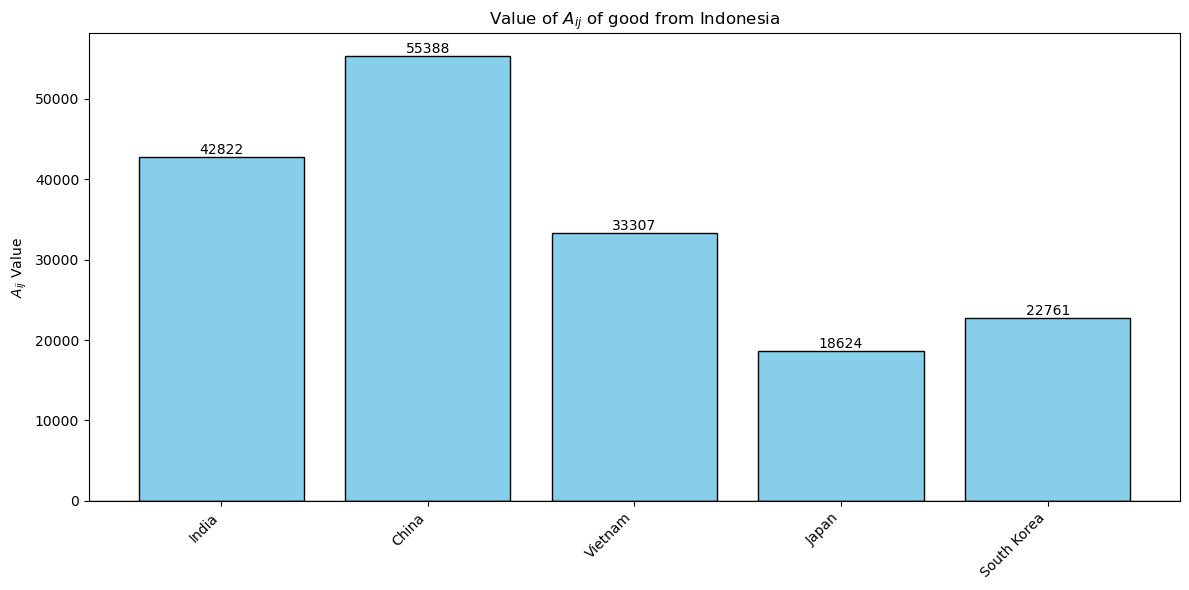

country_to
India          455005.009245
Japan           31024.816810
China          451499.730090
Vietnam         71916.303833
South Korea     41319.371196
Other_imp      323216.377696
dtype: float64


In [30]:


# Suppose que tes intercepts contiennent des négatifs
Aij_values = regression_df.loc[0:4, 'const'].tolist()
country = regression_df.loc[0:4, 'country_to'].tolist()
mean_values_Qij_phii=Q_i_j_phi_i[('Indonesia')].mean()
#print(Aij_values)  # Vérifie qu’il y a des négatifs ici

plt.figure(figsize=(12, 6))
bars = plt.bar(country, Aij_values, color='skyblue', edgecolor='black')
#bars_2 = plt.bar(country, mean_values_Qij_phii, color='skyblue', edgecolor='black')
# Ligne horizontale pour l'axe zéro
plt.axhline(0, color='black', linewidth=1)

# Afficher la valeur sur chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.0f}',
             va='bottom' if yval >= 0 else 'top',
             ha='center')

plt.xticks(rotation=45, ha='right')
plt.ylabel(r'$A_{ij}$ Value')
plt.title(r'Value of $A_{ij}$ of good from Indonesia')

plt.tight_layout()
plt.show()
print(Q_i_j_phi_i[('Indonesia')].mean())

<Axes: xlabel='Date'>

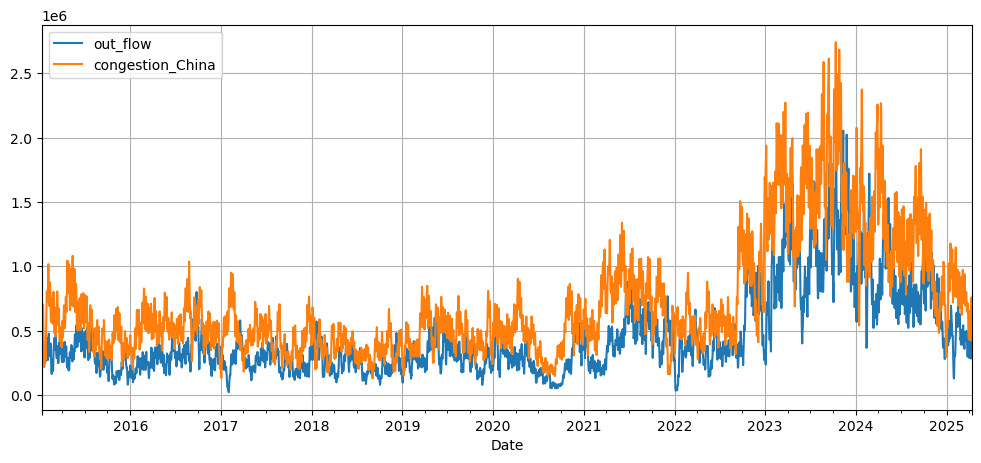

In [31]:
pandas.DataFrame([Q_i_j_phi_i[('Indonesia'), 'China'].rename('out_flow'),
phi_point['China'].rename('congestion_China')]).T.dropna().plot(figsize=(12,5),grid=True, logy=False)

<Axes: xlabel='Date'>

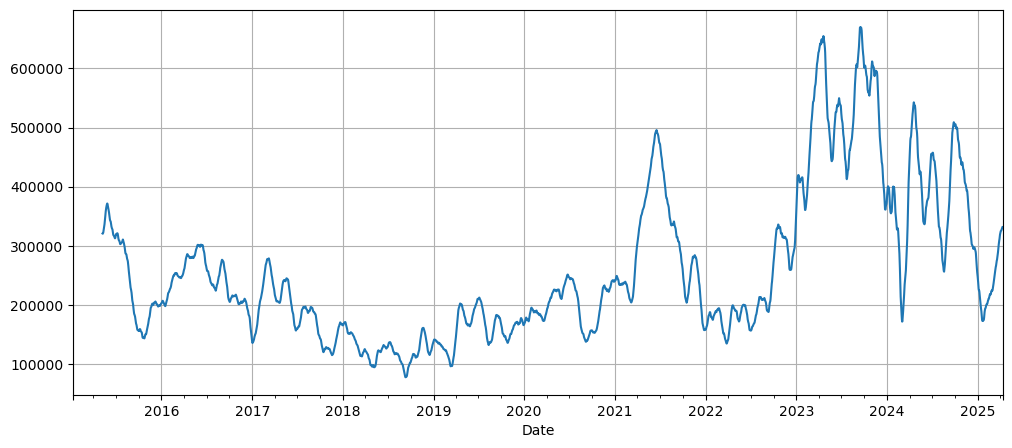

In [32]:
pandas.DataFrame([
    Q_i_j_phi_i[('Indonesia'), 'China'].rename('out_flow'),
    phi_point['China'].rename('congestion_China')
]).T.dropna().diff(axis=1)['congestion_China'].rolling(120).mean().plot(figsize=(12,5),grid=True, logy=False)


<Axes: xlabel='Date'>

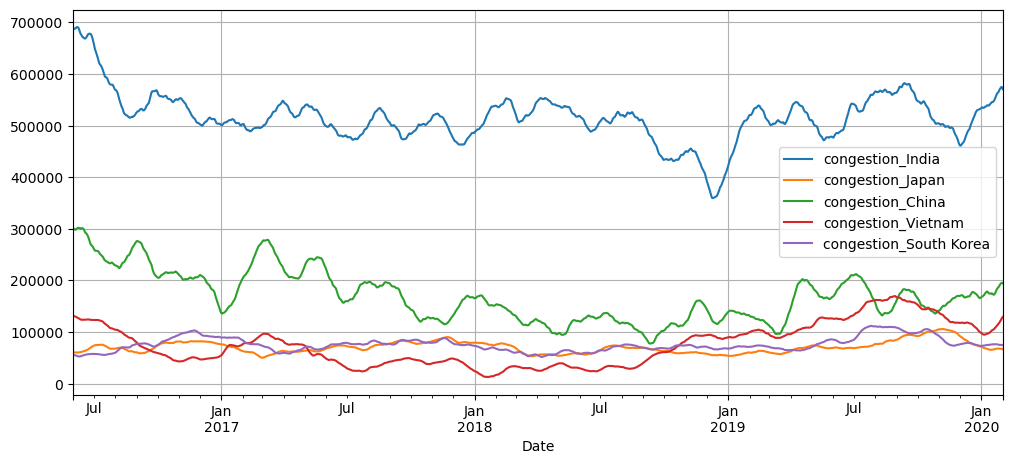

In [33]:
pandas.DataFrame([ pandas.DataFrame([
    Q_i_j_phi_i[('Indonesia'), c_to].rename('out_flow'),
    phi_point[c_to].rename(f'congestion_{c_to}')
]).T.dropna().diff(axis=1)[f'congestion_{c_to}'] for c_to in Q_i_j_phi_i['Indonesia'].columns if c_to!='Other_imp' ]).T.rolling(120).mean()['2016-06-01':'2020-02-01'].plot(figsize=(12,5),grid=True, logy=False)

In [34]:
regression_df[regression_df.country_from=='Indonesia']

,country_from,country_to,good_n,const,phi_point_India,Residus,phi_point_China,phi_point_Vietnam,phi_point_Japan,phi_point_South Korea
0,Indonesia,India,Coal,42822.270438,0.379618,7.971819e+06,NaN,NaN,NaN,NaN
1,Indonesia,China,Coal,55387.723313,NaN,1.341522e+07,0.560764,NaN,NaN,NaN
2,Indonesia,Vietnam,Coal,33307.432587,NaN,1.187816e+06,NaN,0.224821,NaN,NaN
3,Indonesia,Japan,Coal,18624.081164,NaN,3.816372e+05,NaN,NaN,0.094268,NaN
4,Indonesia,South Korea,Coal,22760.920052,NaN,4.098336e+05,NaN,NaN,NaN,0.144523


<Axes: ylabel='country_to'>

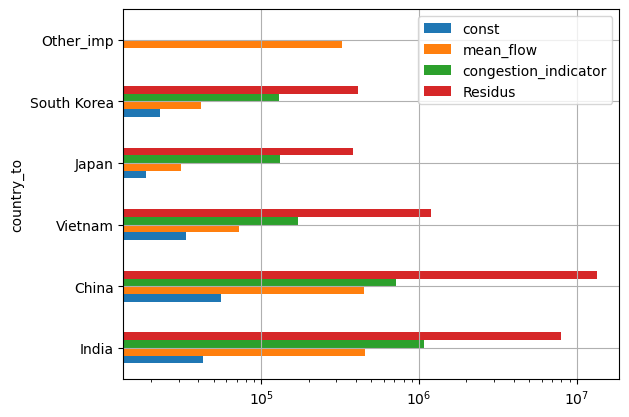

In [35]:
(pandas.concat([
    regression_df[regression_df.country_from=='Indonesia'].set_index('country_to')['const'],
    Q_i_j_phi_i[('Indonesia')].mean().rename('mean_flow'),
    phi_point.mean().rename('congestion_indicator'),
    regression_df[regression_df.country_from=='Indonesia'].set_index('country_to')['Residus']
], axis=1)
 .plot(kind='barh', logx=True, grid=True)
)

<Axes: ylabel='country_to'>

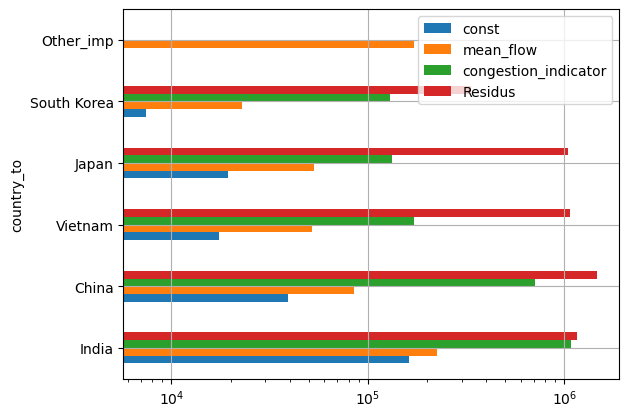

In [36]:
(pandas.concat([
    regression_df[regression_df.country_from=='Australia'].set_index('country_to')['const'],
    Q_i_j_phi_i[('Australia')].mean().rename('mean_flow'),
    phi_point.mean().rename('congestion_indicator'),
    regression_df[regression_df.country_from=='Australia'].set_index('country_to')['Residus']
], axis=1)
 .plot(kind='barh', logx=True, grid=True)
)